In [105]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

In [106]:
from google.colab import drive
drive.mount('/content/drive')
#执行第一步，连接谷歌云盘

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


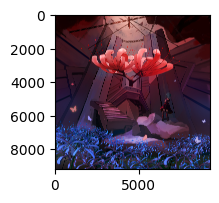

In [107]:
I = mpimg.imread('/content/drive/MyDrive/python 研究/6彼岸开绽2 .jpg')
plt.figure(figsize=(2,2))
plt.imshow(I)
#检查是否连上了谷歌云

# 从云盘中构建图

In [211]:
df = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/桂林线路节点链接关系.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/连接关系和点权重/桂林线路节点属性.csv')

In [212]:
# 过滤空节点
df = df.dropna(subset=["前一节点", "后一节点"])
G = nx.from_pandas_edgelist(df,"前一节点","后一节点", edge_attr=True, create_using=nx.MultiGraph())  #edge_attr=True,边的属性信息也要导入

In [213]:
# 读取CSV文件
df_links = df
df_attributes = df_2

# 创建一个空的多重图
G = nx.MultiGraph()

# 添加节点和边到多重图
for _, row in df_links.iterrows():
    node1 = row['前一节点']
    node2 = row['后一节点']
    edge_attr = row['线路名称']
    if pd.notna(node1) and pd.notna(node2):
        G.add_edge(node1, node2, attribute=edge_attr)


# 添加节点属性到多重图
for _, row in df_attributes.iterrows():
    node = row['节点名称']
    attr1 = row['区域属性']
    attr2 = row['线路']
    attr3 = row['500M内文保单位/古迹遗址/宗祠故地的个数']
    attr4 = row['300M内文保单位/古迹遗址/宗祠故地的个数']

    if pd.notna(node):
        G.add_node(node)
        G.nodes[node]['区域属性'] = attr1
        G.nodes[node]['线路'] = attr2
        G.nodes[node]['500M内文保单位/古迹遗址/宗祠故地的个数'] = attr3
        G.nodes[node]['300M内文保单位/古迹遗址/宗祠故地的个数'] = attr4

In [214]:
#查看节点的属性
for node, attrs in G.nodes.data():
    print("Node:", node)
    print("Attributes:", attrs)
    print()

Node: 桂林北站
Attributes: {'区域属性': '叠彩区', '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 站前路西
Attributes: {'区域属性': '叠彩区', '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 桂北客运站
Attributes: {'区域属性': '叠彩区', '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 站前路中
Attributes: {'区域属性': '叠彩区', '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 站前路
Attributes: {'区域属性': '叠彩区', '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 站前路东
Attributes: {'区域属性': '叠彩区', '线路': '301路', '500M内文保单位/古迹遗址/宗祠故地的个数': 1.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 1.0}

Node: 南洲大桥北
Attributes: {'区域属性': '叠彩区', '线路': '1路', '500M内文保单位/古迹遗址/宗祠故地的个数': 1.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 1.0}

Node: 南洲大桥南
Attributes: {'区域属性': '叠彩区', '线路': '301路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0, '300M内文保单位/古迹遗址/宗祠故地的个数': 0.0}

Node: 芳华路
Attributes: {'区域属性': '叠彩区', '线路': '301路', '500M内文保单位/古迹遗址/宗祠故地的个数': 0.0,

In [215]:
#查看边属性
for u, v, attr in G.edges(data=True):
    print(f"边 ({u}, {v}) 的属性:")
    for key, value in attr.items():
        print(f"{key}: {value}")
    print()

边 (桂林北站, 站前路西) 的属性:
attribute: 1路

边 (站前路西, 桂北客运站) 的属性:
attribute: 1路

边 (桂北客运站, 站前路中) 的属性:
attribute: 1路

边 (站前路中, 站前路) 的属性:
attribute: 1路

边 (站前路, 站前路东) 的属性:
attribute: 1路

边 (站前路东, 南洲大桥北) 的属性:
attribute: 1路

边 (站前路东, 春江路) 的属性:
attribute: 18路

边 (站前路东, 春江路) 的属性:
attribute: 301路

边 (站前路东, 滨北路) 的属性:
attribute: 18路

边 (站前路东, 南洲大桥南) 的属性:
attribute: 301路

边 (南洲大桥北, 南洲大桥南) 的属性:
attribute: 1路

边 (南洲大桥南, 芳华路) 的属性:
attribute: 1路

边 (南洲大桥南, 芳华路) 的属性:
attribute: 301路

边 (芳华路, 五福村) 的属性:
attribute: 1路

边 (芳华路, 永彩路(临时站)) 的属性:
attribute: 301路

边 (五福村, 芳华路东) 的属性:
attribute: 1路

边 (芳华路东, 芳华路西) 的属性:
attribute: 1路

边 (芳华路西, 新建路口) 的属性:
attribute: 1路

边 (新建路口, 群众路口) 的属性:
attribute: 1路

边 (新建路口, 群众路口) 的属性:
attribute: 18路

边 (新建路口, 芳华路口) 的属性:
attribute: 18路

边 (群众路口, 商贸城) 的属性:
attribute: 1路

边 (群众路口, 商贸城) 的属性:
attribute: 18路

边 (商贸城, 北极广场) 的属性:
attribute: 1路

边 (商贸城, 北极广场) 的属性:
attribute: 18路

边 (北极广场, 观音阁) 的属性:
attribute: 1路

边 (北极广场, 观音阁) 的属性:
attribute: 18路

边 (北极广场, 观音阁) 的属性:
attribute: 30路

边 (北极广场, 观

In [216]:
# 获取图G的节点数量
num_nodes = G.number_of_nodes()

print("图G的节点数量为:", num_nodes)

图G的节点数量为: 292


# 获取领接矩阵

In [217]:
# 获取邻接矩阵
adj_matrix = nx.adjacency_matrix(G)
# 将邻接矩阵转换为NumPy数组
adj_array = adj_matrix.toarray()

#打印邻接矩阵
print(adj_array)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]


In [218]:
#获取节点编号列表
node_ids = list(G.nodes())

# 构建邻接矩阵
adj_matrix = nx.adjacency_matrix(G, nodelist=node_ids)

# 将邻接矩阵转换为DataFrame
df1 = pd.DataFrame(adj_matrix.toarray(), index=node_ids, columns=node_ids)

# 保存DataFrame到CSV文件
#df1.to_csv('/content/drive/MyDrive/python 研究/XXXXX', index=True, header=True)

In [219]:
print(len(list(G.nodes())))
list(G.nodes())[14]

292


'商贸城'

# 获取节点属性（权重）

In [220]:
node_attributes = G.nodes.data()
target_attribute = '500M内文保单位/古迹遗址/宗祠故地的个数'
attribute=[]


target_attribute_2 = '300M内文保单位/古迹遗址/宗祠故地的个数'
attribute_2=[]

In [221]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute in attributes:
        attribute_value = attributes[target_attribute]

        attribute.append(attribute_value)
    else:
        attribute.append(-1)

    print("节点:", node)
    print("属性:", target_attribute, "=", attribute_value)
    print()

节点: 桂林北站
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 站前路西
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 桂北客运站
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 站前路中
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 站前路
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 站前路东
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 南洲大桥北
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 南洲大桥南
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 芳华路
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 五福村
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 芳华路东
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 芳华路西
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 新建路口
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 群众路口
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 商贸城
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 北极广场
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 观音阁
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 5.0

节点: 东镇路
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 6.0

节点: 凤北路口
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 7.0

节点: 乐群路口
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 7.0

节点: 十字街(解放西路)
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 6.0

节点: 艺术馆
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 6.0

节点: 观漪桥
属性: 500M内文保单位/古迹遗址/宗祠故地的个数 = 6.0

节点: 信义路口
属性

In [222]:
# 遍历节点属性，获取指定属性的值
for node, attributes in node_attributes:
    if target_attribute_2 in attributes:
        attribute_value = attributes[target_attribute_2]

        attribute_2.append(attribute_value)
    else:
        attribute_2.append(-1)

    print("节点:", node)
    print("属性:", target_attribute_2, "=", attribute_value)
    print()

节点: 桂林北站
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 站前路西
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 桂北客运站
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 站前路中
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 站前路
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 站前路东
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 南洲大桥北
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 南洲大桥南
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 芳华路
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 五福村
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 芳华路东
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 芳华路西
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 新建路口
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 群众路口
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 商贸城
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 北极广场
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 0.0

节点: 观音阁
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 1.0

节点: 东镇路
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 凤北路口
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 乐群路口
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 十字街(解放西路)
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 艺术馆
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 3.0

节点: 观漪桥
属性: 300M内文保单位/古迹遗址/宗祠故地的个数 = 4.0

节点: 信义路口
属性

In [223]:
#获取权重
attribute=np.array(attribute)
print(attribute.shape)

#获取权重
attribute_2=np.array(attribute_2)
print(attribute_2.shape)

(292,)
(292,)


In [224]:
#打印权重
print(attribute)
print(attribute_2)

[ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  5.  6.
  7.  7.  6.  6.  6.  3.  2.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0. 11.
  3.  5.  4. 11.  6.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  8.  5.  2.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  2.  1.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  3.  5.  7.  3.  4.  4.  8.  4.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  4.
  6.  3.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

# 将图的边转换为edge_index

In [225]:
 #获取图的边列表
edge_list = list(G.edges())

# 将边列表转换为 edge_index
edge_index = np.array(edge_list).T

# 打印结果
edge_index= np.array(edge_index)
edge_index

array([['桂林北站', '站前路西', '桂北客运站', '站前路中', '站前路', '站前路东', '站前路东', '站前路东',
        '站前路东', '站前路东', '南洲大桥北', '南洲大桥南', '南洲大桥南', '芳华路', '芳华路', '五福村',
        '芳华路东', '芳华路西', '新建路口', '新建路口', '新建路口', '群众路口', '群众路口', '商贸城',
        '商贸城', '北极广场', '北极广场', '北极广场', '北极广场', '北极广场', '北极广场', '观音阁',
        '观音阁', '观音阁', '观音阁', '观音阁', '观音阁', '观音阁', '观音阁', '观音阁', '东镇路',
        '东镇路', '东镇路', '凤北路口', '凤北路口', '凤北路口', '凤北路口', '凤北路口', '凤北路口',
        '凤北路口', '凤北路口', '凤北路口', '乐群路口', '乐群路口', '乐群路口', '乐群路口', '乐群路口',
        '乐群路口', '十字街(解放西路)', '十字街(解放西路)', '十字街(解放西路)', '十字街(解放西路)',
        '十字街(解放西路)', '十字街(解放西路)', '十字街(解放西路)', '十字街(解放西路)', '十字街(解放西路)',
        '十字街(解放西路)', '十字街(解放西路)', '十字街(解放西路)', '十字街(解放西路)', '十字街(解放西路)',
        '艺术馆', '艺术馆', '艺术馆', '艺术馆', '艺术馆', '艺术馆', '艺术馆', '观漪桥', '观漪桥',
        '观漪桥', '观漪桥', '观漪桥', '观漪桥', '观漪桥', '信义路口', '信义路口', '信义路口',
        '西凤路口', '西凤路口', '九岗岭', '西门菜市', '西门菜市', '西门菜市', '西门菜市', '西门菜市',
        '东安街口', '东安街口', '象山区政府', '象山区政府', '机场路口', '机场路口', '机场路口', '翠竹路',
      

In [226]:
#查看边的数量
edge_index.shape

(2, 455)

**提取纯数字的edge_index**

In [227]:
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G2 = nx.convert_node_labels_to_integers(G)
# 获取图的边列表
edge_list_number = list(G2.edges())
# 将边列表转换为 edge_index
edge_index_number = np.array(edge_list_number).T

# 打印结果
edge_index_number= np.array(edge_index_number)
print(edge_index_number)
print(edge_index_number.shape)

#shape 格式与上方一致即可进行下一步

[[  0   1   2   3   4   5   5   5   5   5   6   7   7   8   8   9  10  11
   12  12  12  13  13  14  14  15  15  15  15  15  15  16  16  16  16  16
   16  16  16  16  17  17  17  18  18  18  18  18  18  18  18  18  19  19
   19  19  19  19  20  20  20  20  20  20  20  20  20  20  20  20  20  20
   21  21  21  21  21  21  21  22  22  22  22  22  22  22  23  23  23  24
   24  25  26  26  26  26  26  27  27  28  28  29  29  29  30  30  31  32
   33  34  35  35  35  35  35  35  35  35  35  36  37  37  37  37  37  37
   37  37  37  37  37  37  37  37  37  37  37  38  38  39  39  39  39  40
   40  41  41  41  42  42  42  43  45  45  46  46  47  48  48  48  49  49
   50  51  52  53  54  55  56  58  58  58  58  59  59  59  59  59  59  59
   59  59  59  59  59  60  60  60  60  60  60  61  61  61  61  62  63  64
   65  65  65  66  67  67  67  68  68  68  69  69  70  71  72  73  74  75
   76  77  79  79  79  79  80  80  80  80  80  81  81  82  82  82  83  83
   83  84  84  85  85  86  87  88  89 

**创建节点映射字典**

In [228]:
# 获取 NetworkX 内部的节点编号，这串代码会直接创建一个新的图，并且替换掉里面的所有文字，变成数字
G_int_labels = nx.convert_node_labels_to_integers(G)

In [229]:
#dir(G_int_labels)   #查看G_int_labels 支持的后缀
G_int_labels.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [230]:
list1=G_int_labels.nodes
list1=np.array(list1)
list1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [231]:
list_1=G.nodes.data()
list_1=np.array(list_1)
print(list_1[3][0])

list_2=list_1
list2 = []  # 创建一个空列表，用于存储遍历结果

for item in list_2:
    list2.append(item[0])

list2=np.array(list2)

#list2#此处可以查看list2

站前路中


In [232]:
list1 = list1
list2 = list2
mapping_dict = { }  # 创建一个空字典

for i in range(len(list1)):
    key = str(list1[i])  # 将整数转换为字符串作为键
    value = list2[i]  # 节点名称作为值
    mapping_dict[key] = value

In [233]:
mapping_dict["208"]

'桂林康复中心'

# 统计已有信息

**邻接矩阵**

In [234]:
#邻接矩阵
print(adj_array)
print(adj_array.shape)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]
(292, 292)


**500M内古迹数量**

In [235]:
#500m内古迹的数量，作为权重
print(attribute)
print(attribute.shape)

[ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  5.  6.
  7.  7.  6.  6.  6.  3.  2.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0. 11.
  3.  5.  4. 11.  6.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  8.  5.  2.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  2.  1.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  3.  5.  7.  3.  4.  4.  8.  4.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  4.
  6.  3.  3.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

**300M内古迹数量**

In [236]:
#500m内古迹的数量，作为权重
print(attribute_2)
print(attribute_2.shape)

[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3. 3. 3. 3. 3. 4. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 9. 2. 2. 1. 5. 1. 3. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 3. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 2. 3. 0. 2. 2. 3. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 2. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 3. 1. 3. 1. 1. 2. 0. 0. 0. 0. 8. 8. 1. 1. 5. 3. 2. 2. 0. 5.
 5. 0. 3. 4.]
(292,)


In [237]:
#检查权重是否都大于等于0，如果不是，那么权重矩阵有问题。
arr = attribute_2

if (arr >= 0).all():
  print('True')
else:
  print('False')

True


**拼接邻接矩阵和古迹数量矩阵**

In [238]:
attribute_combined=np.concatenate((adj_array, attribute.reshape(-1,1)), axis=1)
attribute_combined_1=np.concatenate((attribute_combined, attribute_2.reshape(-1,1)), axis=1)
print(attribute_combined_1.shape)

(292, 294)


**参考标签制作，此处需要将古迹数量的节点进行归类，可以选择3类4类都可以**

In [262]:
#此处需要将古迹数量的节点进行归类，可以选择3类4类都可以，这个归类会影响最终结果。这是计算机在向你询问边界是什么样子的。
#注意调整range的值，针对昆明，因为有两个层级的数据，可以考虑加权求和。
attribute_label=[]
for i in range(292):
  if (attribute[i]*1.0+(attribute_2[i])*0.5)<3 :
    attribute_label.append(0)
  elif (attribute[i]*1.0+(attribute_2[i])*0.5)<=8:
    attribute_label.append(1)
  else:
    attribute_label.append(2)


attribute_label=np.array(attribute_label)
attribute_label.shape

(292,)

**点和点的链接关系**

In [263]:
#点和点的连接关系，另一种表现形式,从边的角度考虑
print(edge_index)
print(edge_index.shape)

[['桂林北站' '站前路西' '桂北客运站' '站前路中' '站前路' '站前路东' '站前路东' '站前路东' '站前路东' '站前路东'
  '南洲大桥北' '南洲大桥南' '南洲大桥南' '芳华路' '芳华路' '五福村' '芳华路东' '芳华路西' '新建路口' '新建路口'
  '新建路口' '群众路口' '群众路口' '商贸城' '商贸城' '北极广场' '北极广场' '北极广场' '北极广场' '北极广场'
  '北极广场' '观音阁' '观音阁' '观音阁' '观音阁' '观音阁' '观音阁' '观音阁' '观音阁' '观音阁' '东镇路'
  '东镇路' '东镇路' '凤北路口' '凤北路口' '凤北路口' '凤北路口' '凤北路口' '凤北路口' '凤北路口' '凤北路口'
  '凤北路口' '乐群路口' '乐群路口' '乐群路口' '乐群路口' '乐群路口' '乐群路口' '十字街(解放西路)'
  '十字街(解放西路)' '十字街(解放西路)' '十字街(解放西路)' '十字街(解放西路)' '十字街(解放西路)' '十字街(解放西路)'
  '十字街(解放西路)' '十字街(解放西路)' '十字街(解放西路)' '十字街(解放西路)' '十字街(解放西路)' '十字街(解放西路)'
  '十字街(解放西路)' '艺术馆' '艺术馆' '艺术馆' '艺术馆' '艺术馆' '艺术馆' '艺术馆' '观漪桥' '观漪桥' '观漪桥'
  '观漪桥' '观漪桥' '观漪桥' '观漪桥' '信义路口' '信义路口' '信义路口' '西凤路口' '西凤路口' '九岗岭' '西门菜市'
  '西门菜市' '西门菜市' '西门菜市' '西门菜市' '东安街口' '东安街口' '象山区政府' '象山区政府' '机场路口' '机场路口'
  '机场路口' '翠竹路' '翠竹路' '黑山路口' '东莲站' '鼎富大厦' '琴潭汽车客运站' '象山公园' '象山公园' '象山公园'
  '象山公园' '象山公园' '象山公园' '象山公园' '象山公园' '象山公园' '漓江剧院' '解放桥' '解放桥' '解放桥'
  '解放桥' '解放桥' '解放桥' '解放桥' '解放桥' '解放桥' '解放桥' '解放桥' '解放桥' '解放桥' '解放桥' '解放桥'

In [269]:
print(edge_index_number)
print(edge_index_number.shape)

[[  0   1   2   3   4   5   5   5   5   5   6   7   7   8   8   9  10  11
   12  12  12  13  13  14  14  15  15  15  15  15  15  16  16  16  16  16
   16  16  16  16  17  17  17  18  18  18  18  18  18  18  18  18  19  19
   19  19  19  19  20  20  20  20  20  20  20  20  20  20  20  20  20  20
   21  21  21  21  21  21  21  22  22  22  22  22  22  22  23  23  23  24
   24  25  26  26  26  26  26  27  27  28  28  29  29  29  30  30  31  32
   33  34  35  35  35  35  35  35  35  35  35  36  37  37  37  37  37  37
   37  37  37  37  37  37  37  37  37  37  37  38  38  39  39  39  39  40
   40  41  41  41  42  42  42  43  45  45  46  46  47  48  48  48  49  49
   50  51  52  53  54  55  56  58  58  58  58  59  59  59  59  59  59  59
   59  59  59  59  59  60  60  60  60  60  60  61  61  61  61  62  63  64
   65  65  65  66  67  67  67  68  68  68  69  69  70  71  72  73  74  75
   76  77  79  79  79  79  80  80  80  80  80  81  81  82  82  82  83  83
   83  84  84  85  85  86  87  88  89 

**节点和数字间的映射关系**

In [271]:
#节点和数字间的映射关系

print(mapping_dict)
print(len(mapping_dict))

{'0': '桂林北站', '1': '站前路西', '2': '桂北客运站', '3': '站前路中', '4': '站前路', '5': '站前路东', '6': '南洲大桥北', '7': '南洲大桥南', '8': '芳华路', '9': '五福村', '10': '芳华路东', '11': '芳华路西', '12': '新建路口', '13': '群众路口', '14': '商贸城', '15': '北极广场', '16': '观音阁', '17': '东镇路', '18': '凤北路口', '19': '乐群路口', '20': '十字街(解放西路)', '21': '艺术馆', '22': '观漪桥', '23': '信义路口', '24': '西凤路口', '25': '九岗岭', '26': '西门菜市', '27': '东安街口', '28': '象山区政府', '29': '机场路口', '30': '翠竹路', '31': '黑山路口', '32': '东莲站', '33': '鼎富大厦', '34': '琴潭汽车客运站', '35': '象山公园', '36': '漓江剧院', '37': '解放桥', '38': '伏波山', '39': '叠彩山', '40': '十字街中心广场', '41': '文明路', '42': '民主路', '43': '安新小区北门', '44': '上海路口', '45': '红岭路南口', '46': '红岭路北口', '47': '东安路', '48': '东安路西', '49': '琴潭中隐路口', '50': '中隐路尾', '51': '养生谷·中医街', '52': '桂林健康学院', '53': '养生谷·颐养阁', '54': '中隐路(马家蚌村)', '55': '熊家村', '56': '西二环', '57': '福达农产品物流园', '58': '天鹅塘', '59': '桂林站', '60': '南门桥南', '61': '西城路口', '62': '阳桥', '63': '信义路尾', '64': '隧道北口', '65': '芦笛路', '66': '环城北一路', '67': '圣隆路', '68': '九华山', '69': '芦笛菜市', '70': '冶金机械厂', '

In [272]:
#节点和数字间的映射关系(翻转)
reversed_dict = {value: key for key, value in mapping_dict.items()}
print(reversed_dict)

{'桂林北站': '0', '站前路西': '1', '桂北客运站': '2', '站前路中': '3', '站前路': '4', '站前路东': '5', '南洲大桥北': '6', '南洲大桥南': '7', '芳华路': '8', '五福村': '9', '芳华路东': '10', '芳华路西': '11', '新建路口': '12', '群众路口': '13', '商贸城': '14', '北极广场': '15', '观音阁': '16', '东镇路': '17', '凤北路口': '18', '乐群路口': '19', '十字街(解放西路)': '20', '艺术馆': '21', '观漪桥': '22', '信义路口': '23', '西凤路口': '24', '九岗岭': '25', '西门菜市': '26', '东安街口': '27', '象山区政府': '28', '机场路口': '29', '翠竹路': '30', '黑山路口': '31', '东莲站': '32', '鼎富大厦': '33', '琴潭汽车客运站': '34', '象山公园': '35', '漓江剧院': '36', '解放桥': '37', '伏波山': '38', '叠彩山': '39', '十字街中心广场': '40', '文明路': '41', '民主路': '42', '安新小区北门': '43', '上海路口': '44', '红岭路南口': '45', '红岭路北口': '46', '东安路': '47', '东安路西': '48', '琴潭中隐路口': '49', '中隐路尾': '50', '养生谷·中医街': '51', '桂林健康学院': '52', '养生谷·颐养阁': '53', '中隐路(马家蚌村)': '54', '熊家村': '55', '西二环': '56', '福达农产品物流园': '57', '天鹅塘': '58', '桂林站': '59', '南门桥南': '60', '西城路口': '61', '阳桥': '62', '信义路尾': '63', '隧道北口': '64', '芦笛路': '65', '环城北一路': '66', '圣隆路': '67', '九华山': '68', '芦笛菜市': '69', '冶金机械厂': '70', '

**掩码的的制作**

In [273]:
total_nodes = len(attribute_label)#此处相比福州作了改进，我们直接用古迹数量权重列表的长度作为节点总数量
num_false = 100

mask_1 = np.array([False] * num_false + [True] * (total_nodes - num_false))
np.random.shuffle(mask_1)

In [274]:
print(mask_1)
print(mask_1.shape)

[ True  True  True  True  True  True  True  True  True False False  True
 False False False False False False False False False False  True  True
 False False  True False  True False  True  True False  True  True  True
 False False  True  True False False False  True  True  True  True  True
  True False  True  True  True False  True  True False  True  True  True
 False  True  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True  True  True False  True
 False False False  True  True False  True  True False False  True False
  True False False False  True  True  True  True False  True  True  True
  True False  True  True False  True  True False  True False  True  True
 False  True  True  True  True  True  True False  True  True False  True
  True  True  True  True  True False False  True False False  True  True
  True  True  True False  True  True  True  True  True  True  True False
 False  True  True  True  True False False  True  T

# 分支探索：图自编码器

In [ ]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.8 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

In [ ]:
from torch_geometric.data import Data

# 准备邻接矩阵和节点标签
adj_matrix = adj_array  # 邻接矩阵，可以是二维稀疏张量或二维numpy数组
node_labels = attribute_label # 节点标签，可以是一维张量或一维numpy数组  numeric_array   attribute  attribute_3   attribute_combined_1
node_labels_2=attribute
# 创建一个data对象
data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(attribute_combined_1), train_mask=torch.tensor(mask_1))

In [ ]:
# 假设 data.b 是初始特征矩阵，data.inde_edge 是边列表
# 请确保 data.b 和 data.inde_edge 已定义并正确地导入
node_features = torch.tensor(attribute_combined_1, dtype=torch.float32)  # 确保数据类型是 float32
edge_index = torch.tensor(adj_matrix.nonzero(), dtype=torch.long)  # 边列表通常是 long 类型

In [ ]:
# 创建 PyTorch Geometric 的数据对象
graph_data = Data(x=node_features, edge_index=edge_index)

**定义图自编码器**

In [ ]:
class GraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphAutoencoder, self).__init__()
        # 编码器部分
        self.encoder = GCNConv(input_dim, hidden_dim)
        self.hidden_layer = GCNConv(hidden_dim, hidden_dim)
        self.z_layer = GCNConv(hidden_dim, output_dim)

    def encode(self, x, edge_index):
        x = self.encoder(x, edge_index)
        x = F.relu(x)
        x = self.hidden_layer(x, edge_index)
        x = F.relu(x)
        z = self.z_layer(x, edge_index)
        return z

    def decode(self, z, edge_index):
        # 使用内积解码边缘信息
        return torch.sigmoid((z[edge_index[0]] * z[edge_index[1]]).sum(dim=1))

    def forward(self, x, edge_index):
        z = self.encode(x, edge_index)
        reconstructed_edges = self.decode(z, edge_index)
        return z, reconstructed_edges

# 定义模型、损失函数和优化器
input_dim = node_features.shape[1]  # 411
hidden_dim = 12  # 可以自行调整
output_dim = 3  # 目标嵌入维度

model = GraphAutoencoder(input_dim, hidden_dim, output_dim)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()  # 使用二元交叉熵损失函数进行链接重建


In [ ]:
# 训练过程
def train_model():  # 确保使用正确的函数名称
    model.train()
    optimizer.zero_grad()
    z, reconstructed_edges = model(graph_data.x, graph_data.edge_index)
    # 使用边连接来计算重构损失
    loss = criterion(reconstructed_edges, torch.ones(edge_index.size(1), dtype=torch.float32))
    loss.backward()
    optimizer.step()
    return loss.item()

In [ ]:
# 训练模型
num_epochs = 200  # 可以根据需要调整
for epoch in range(num_epochs):
    loss = train_model()  # 确保调用正确的训练函数
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

Epoch 0, Loss: 0.6500
Epoch 10, Loss: 0.0006
Epoch 20, Loss: 0.0000
Epoch 30, Loss: 0.0000
Epoch 40, Loss: 0.0000
Epoch 50, Loss: 0.0000
Epoch 60, Loss: 0.0000
Epoch 70, Loss: 0.0000
Epoch 80, Loss: 0.0000
Epoch 90, Loss: 0.0000
Epoch 100, Loss: 0.0000
Epoch 110, Loss: 0.0000
Epoch 120, Loss: 0.0000
Epoch 130, Loss: 0.0000
Epoch 140, Loss: 0.0000
Epoch 150, Loss: 0.0000
Epoch 160, Loss: 0.0000
Epoch 170, Loss: 0.0000
Epoch 180, Loss: 0.0000
Epoch 190, Loss: 0.0000


In [ ]:
# 获取嵌入
model.eval()
with torch.no_grad():
    embeddings, _ = model(graph_data.x, graph_data.edge_index)

print("Node embeddings shape:", embeddings.shape)


Node embeddings shape: torch.Size([439, 3])


In [ ]:
embeddings

tensor([[ 3.1776,  4.5178, -3.9765],
        [ 4.0686,  5.7802, -5.1863],
        [ 5.6294,  8.0419, -7.3524],
        ...,
        [ 7.3122, 10.1466, -9.1570],
        [ 5.8713,  8.0914, -7.2186],
        [ 4.7580,  6.5495, -5.7658]])

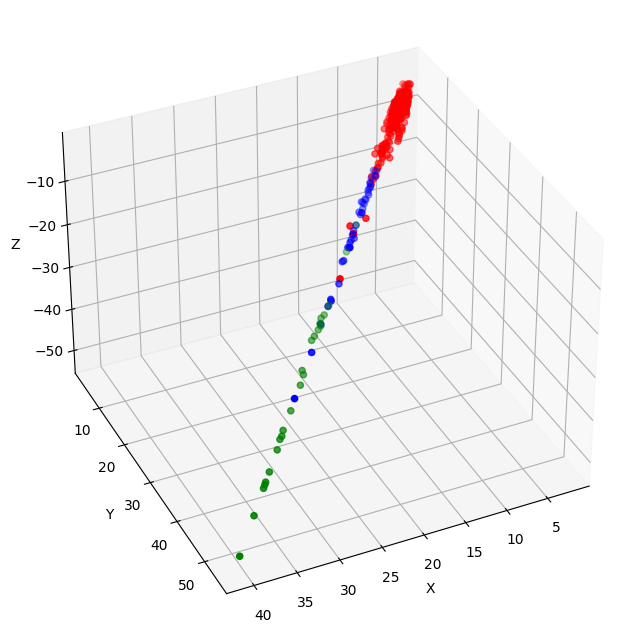

In [ ]:
# 将NumPy数组转换为Python列表
h_1= embeddings.tolist()
B_1=data.y.tolist()

# 提取h的坐标数据
x = [row[0] for row in h_1]
y = [row[1] for row in h_1]
z = [row[2] for row in h_1]

# 创建三维图形对象
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，并根据列表B的值设置不同的颜色
colors = ['red', 'blue', 'green']
label_set = set(B_1)  # 获取唯一的标签值
for label in label_set:
    indices = [i for i, value in enumerate(B_1) if value == label]
    ax.scatter([x[i] for i in indices], [y[i] for i in indices], [z[i] for i in indices], c=colors[label], marker='o')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# 设置初始视角  elev表示俯仰角  azim表示方位角
ax.view_init(elev=35, azim=65)

# 显示图形
plt.show()

# 构建图神经网络之前的准备工作

In [256]:
# Install required packages.

import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

2.4.0+cu121
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


**检查数据集结构是否一致**

In [275]:
from torch_geometric.data import Data

# 准备邻接矩阵和节点标签
adj_matrix = adj_array  # 邻接矩阵，可以是二维稀疏张量或二维numpy数组
node_labels = attribute_label # 节点标签，可以是一维张量或一维numpy数组  numeric_array   attribute  attribute_3   attribute_combined_1
node_labels_2=attribute
# 创建一个data对象
data = Data(x=torch.tensor(adj_matrix), edge_index=torch.tensor(adj_matrix.nonzero()), y=torch.tensor(node_labels) ,z=torch.tensor(node_labels_2) ,b=torch.tensor(attribute_combined_1), train_mask=torch.tensor(mask_1))

In [276]:
data  #注意，z此时并没有什么用

Data(x=[292, 292], edge_index=[2, 700], y=[292], z=[292], b=[292, 294], train_mask=[292])

In [277]:
data.edge_index.shape

torch.Size([2, 700])

**设计一个绘图函数**

In [278]:
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

**设计一个可视化嵌入**

In [291]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    #plt.xticks([])
    #plt.yticks([])
    h = h.detach().cpu().numpy()
    scatter=plt.scatter(h[:, 1], h[:, 2], s=70, c=color, cmap="Set2")#Set2  cool


    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.colorbar(scatter)
    plt.show()

**用不同形状显示可视化嵌入**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import torch

def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    h = h.detach().cpu().numpy()
    color = color.detach().cpu().numpy()

    markers = ['o', '^', 's', 'p', '*', 'x', 'D', '+', 'v', '<', '>']  # 定义标记
    unique_colors = set(color)  # 获取唯一的类别

    for i, u_color in enumerate(unique_colors):
        marker = markers[i % len(markers)]  # 使用不同的标记
        mask = (color == u_color)
        #plt.scatter(h[mask, 0], h[mask, 1], s=70, marker=marker, label=f'Class {u_color}')
        plt.scatter(h[mask, 0], h[mask, 1], s=70, marker=marker)

    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)

    plt.legend()
    plt.show()

**开始可视化**

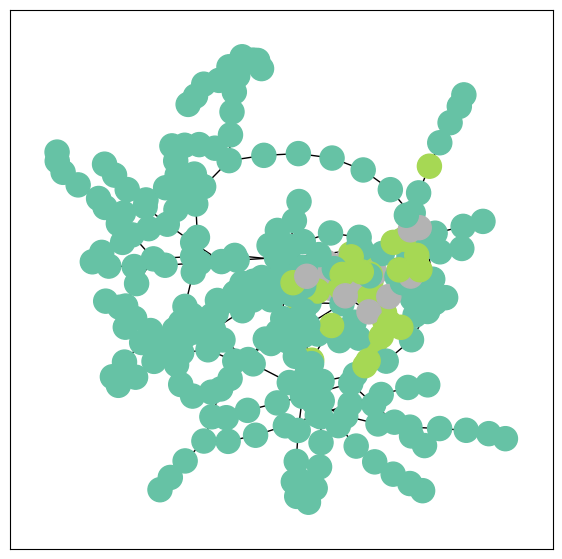

In [280]:
#这步是必要的，请观察是否有独立的节点。没有就是正常。
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

# 构建图神经网络

In [281]:
len(attribute_combined_1.T)#这是输入端的参数，扬州版本的代码相比福州的进步是：不再需要手动修改

294

In [287]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
#记得修改输入端的参数，必须保持一致

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(123)
        self.conv1 = GCNConv(len(attribute_combined_1.T), 128)
        self.conv2 = GCNConv(128, 32)
        self.conv3 = GCNConv(32, 6)
        self.classifier = Linear(6, 6)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(294, 128)
  (conv2): GCNConv(128, 32)
  (conv3): GCNConv(32, 6)
  (classifier): Linear(in_features=6, out_features=6, bias=True)
)


**观察嵌入**

Embedding shape: [292, 6]


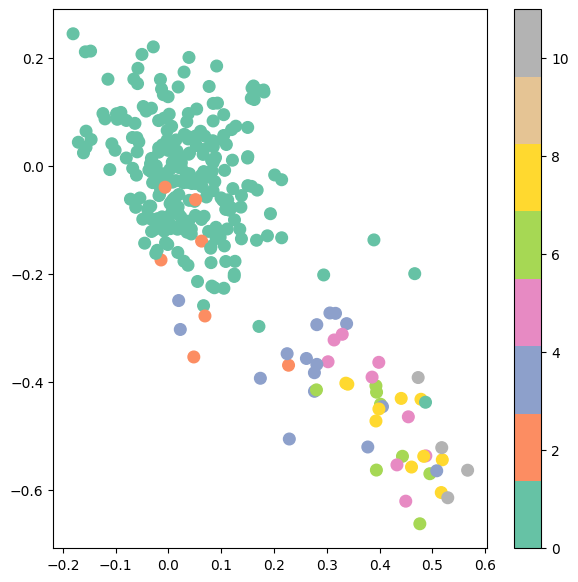

In [292]:
model = GCN()

_, h = model(data.b.float(), data.edge_index)

print(f'Embedding shape: {list(h.shape)}')

visualize_embedding(h, color=data.z)   #data.y  data.z

In [289]:
#再次检查数据结构
print(data.y[data.train_mask])
print(data.train_mask.shape)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2])
torch.Size([292])


**开始训练模型**

<IPython.core.display.Javascript object>

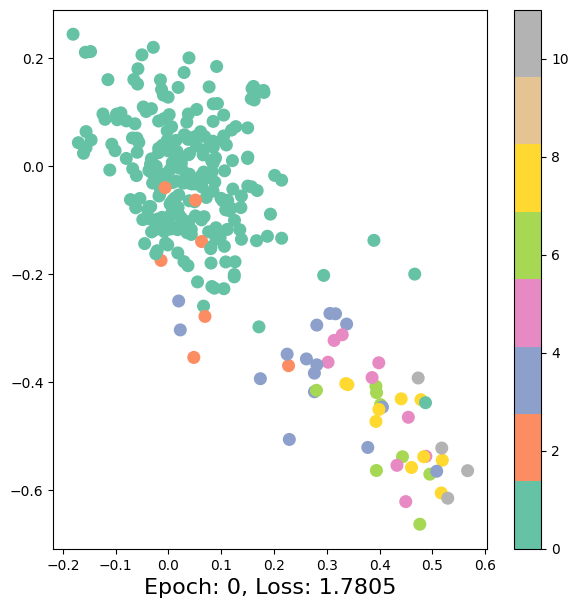

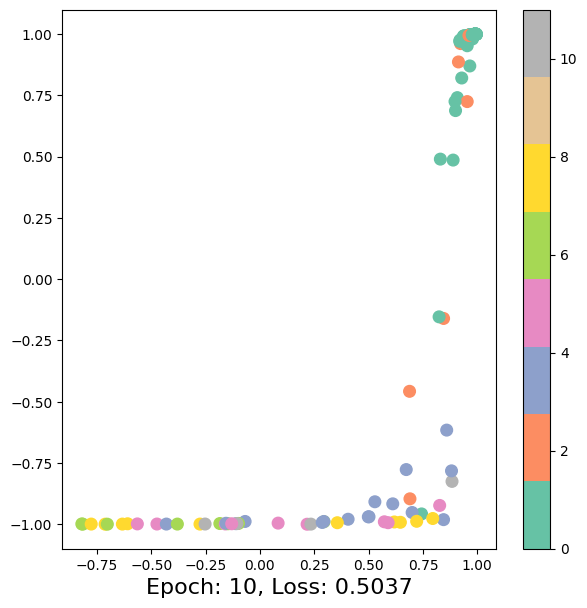

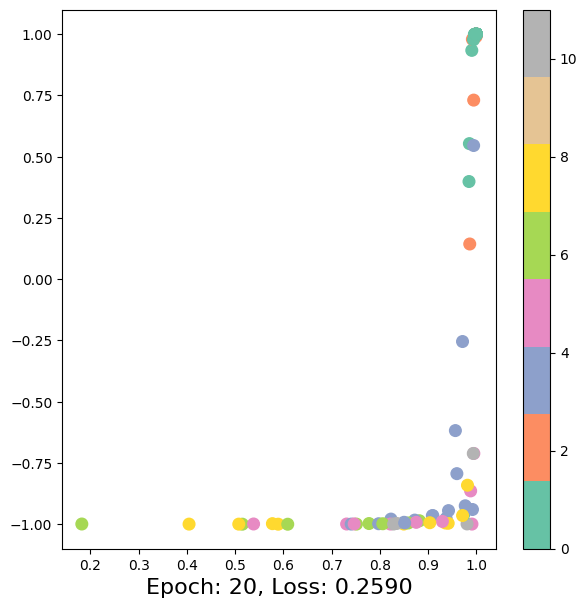

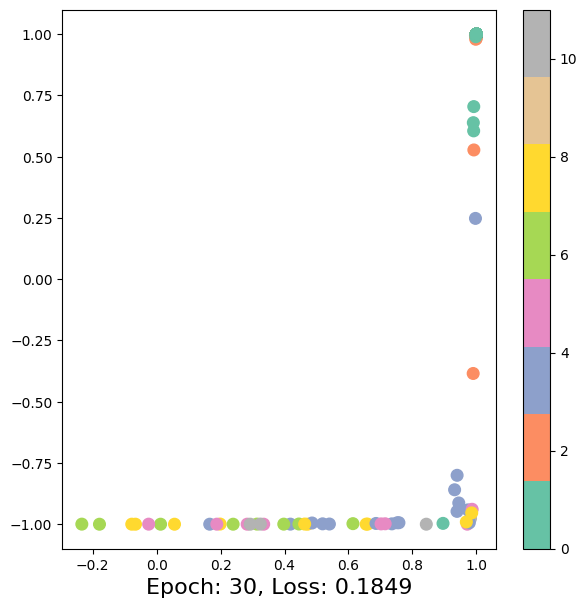

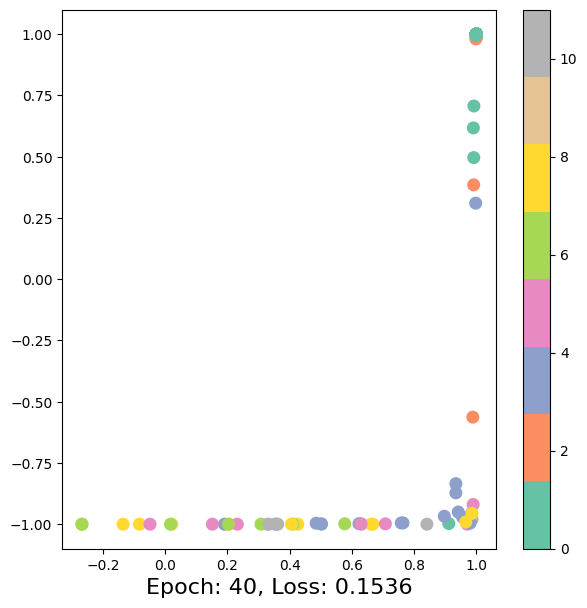

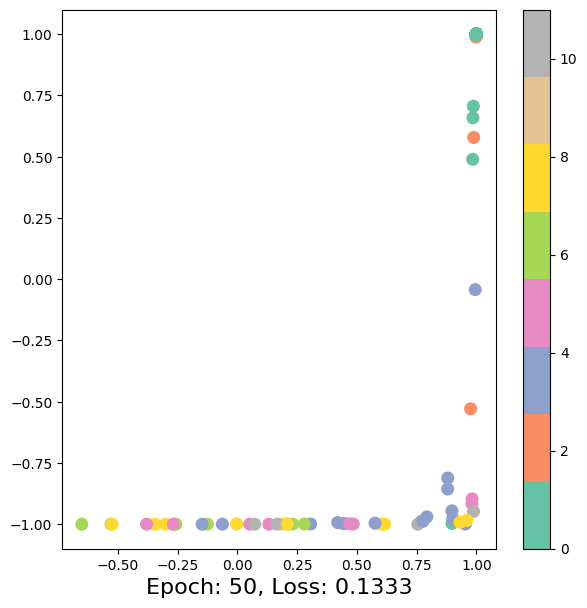

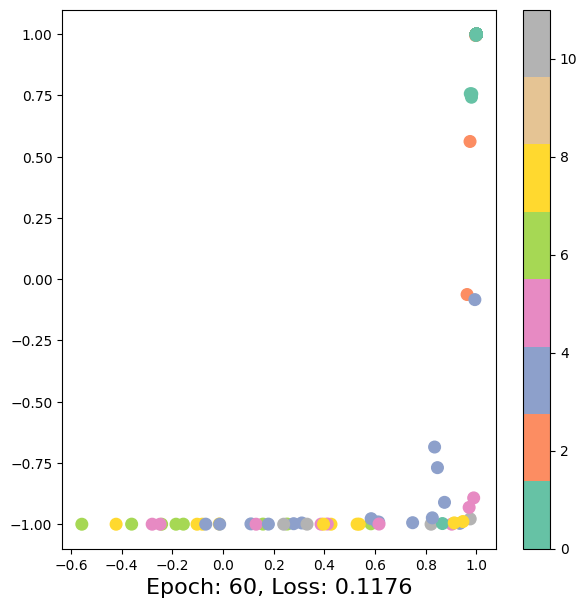

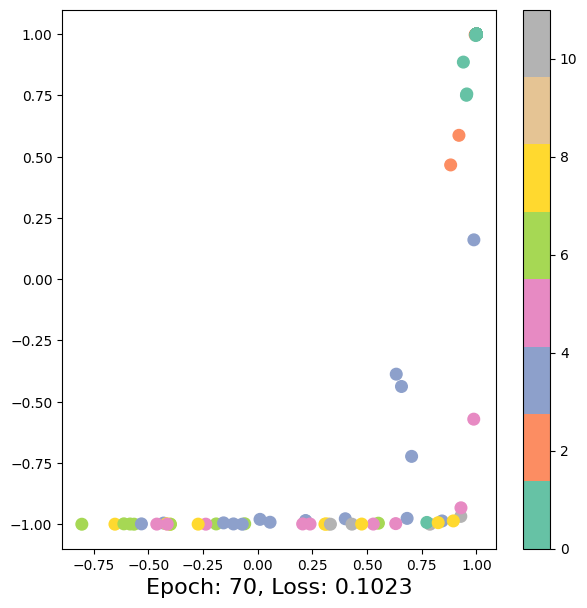

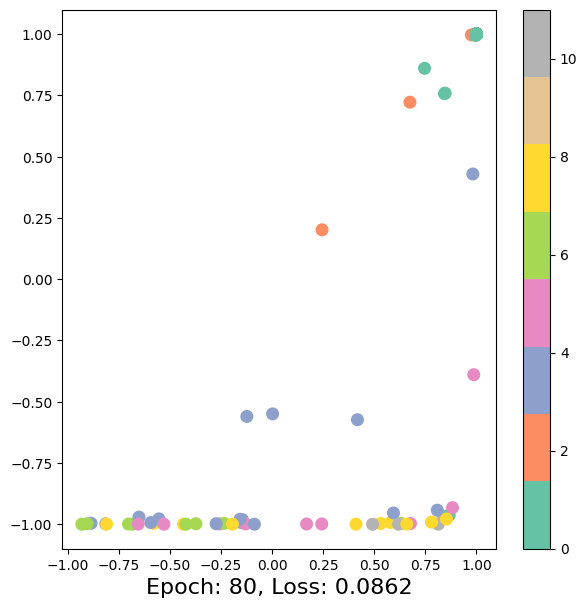

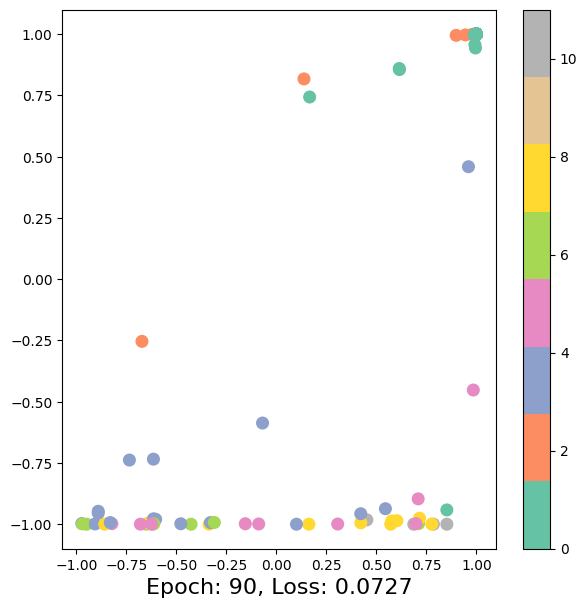

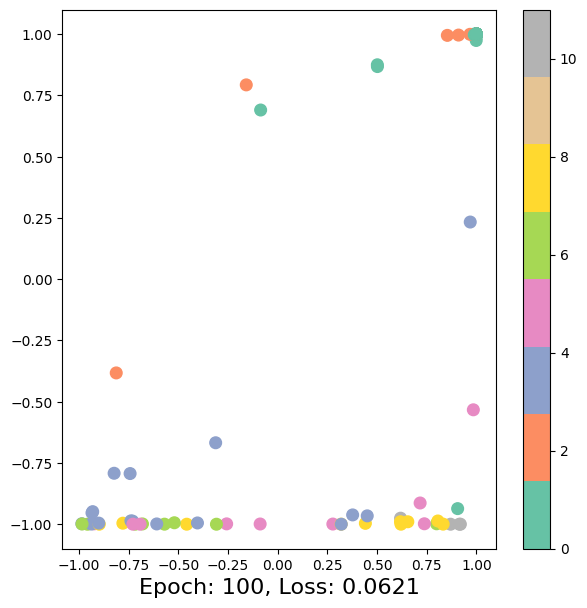

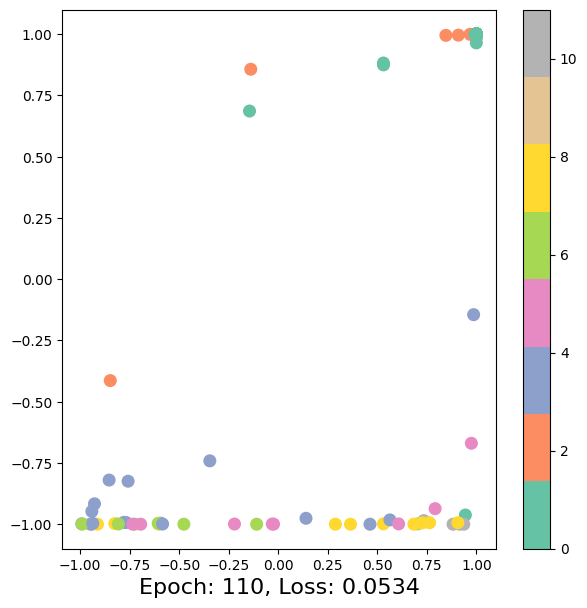

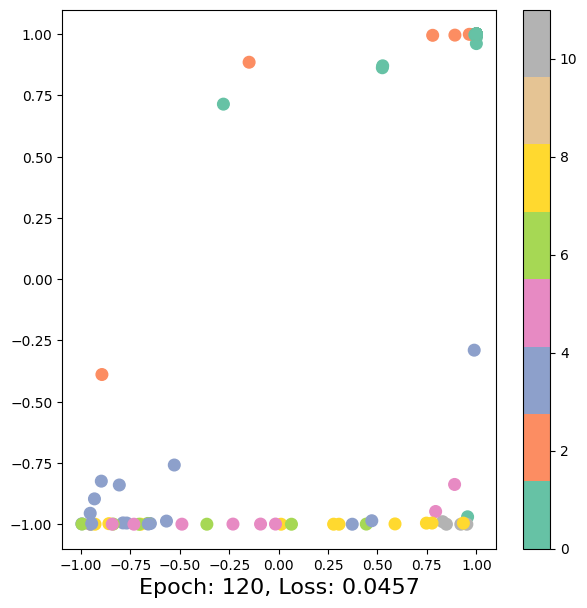

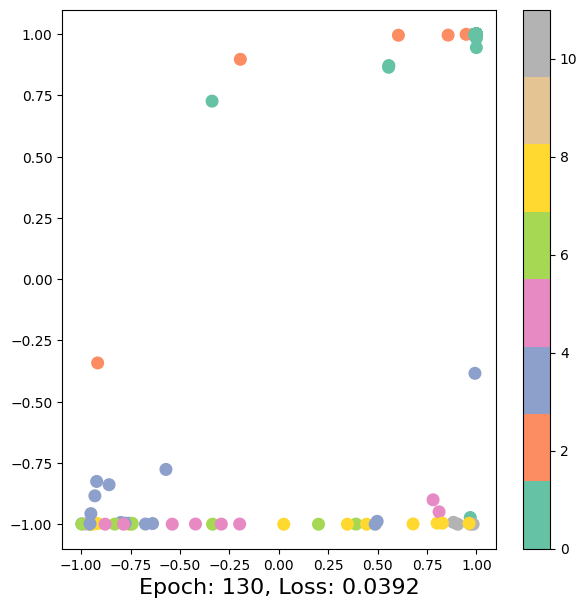

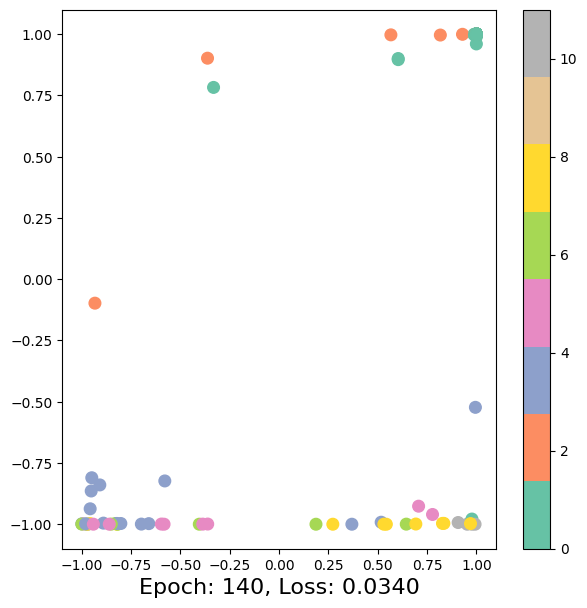

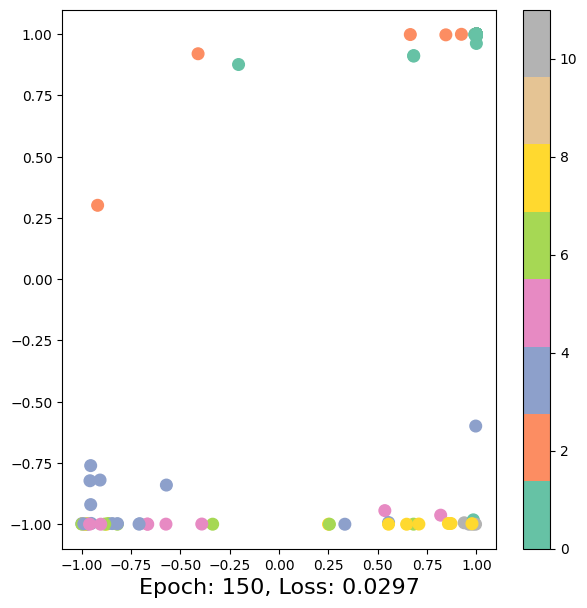

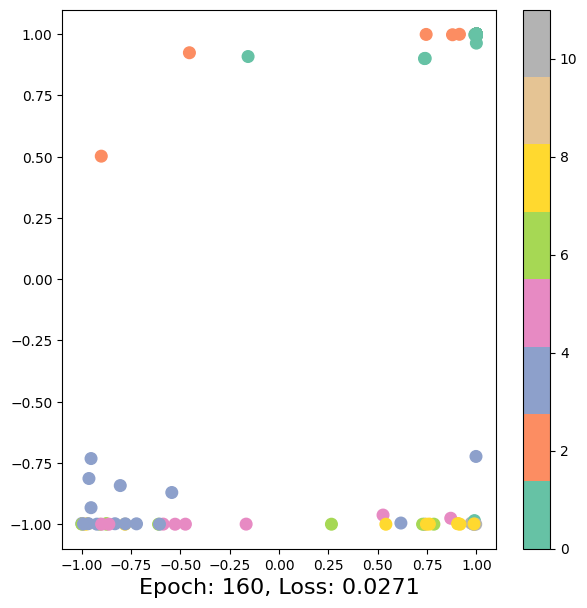

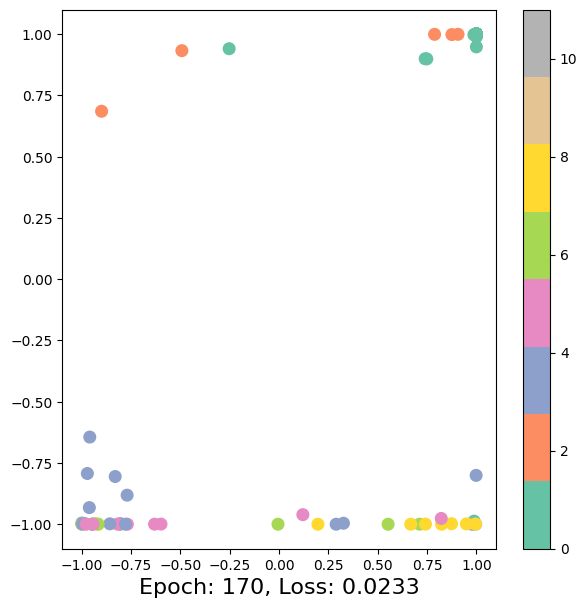

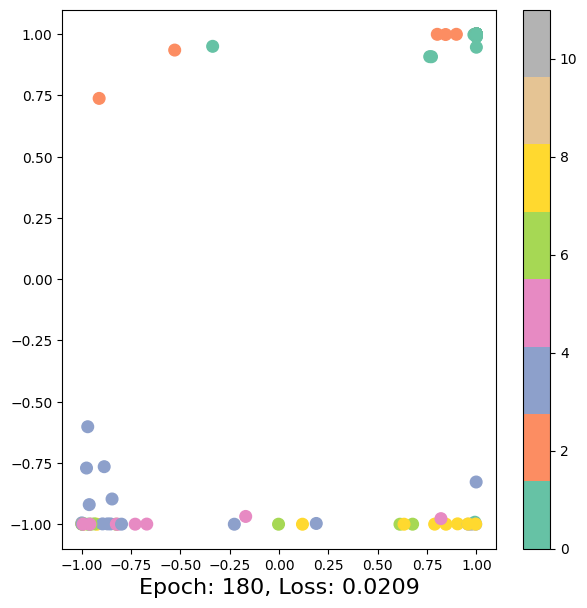

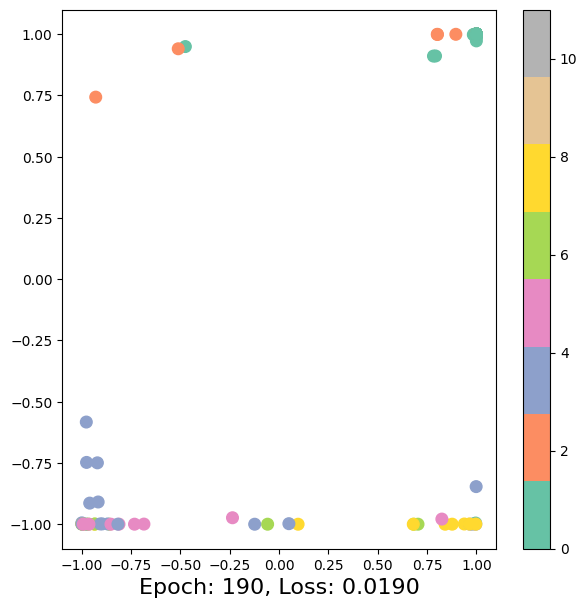

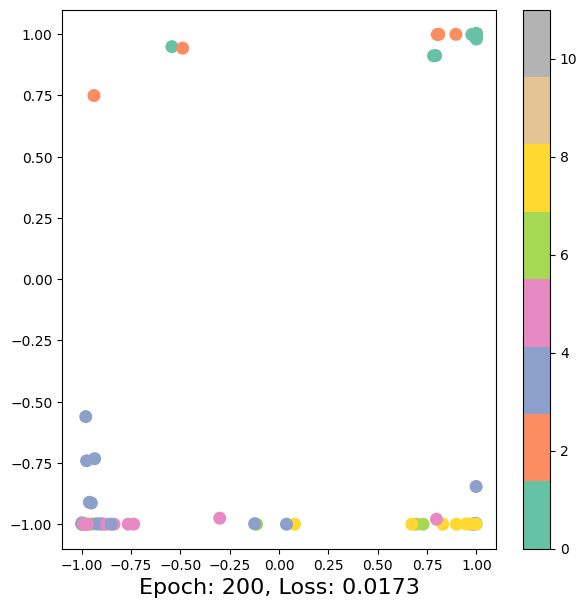

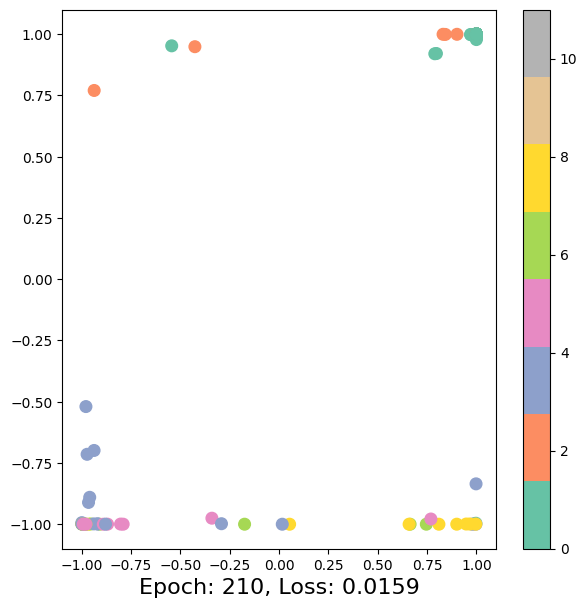

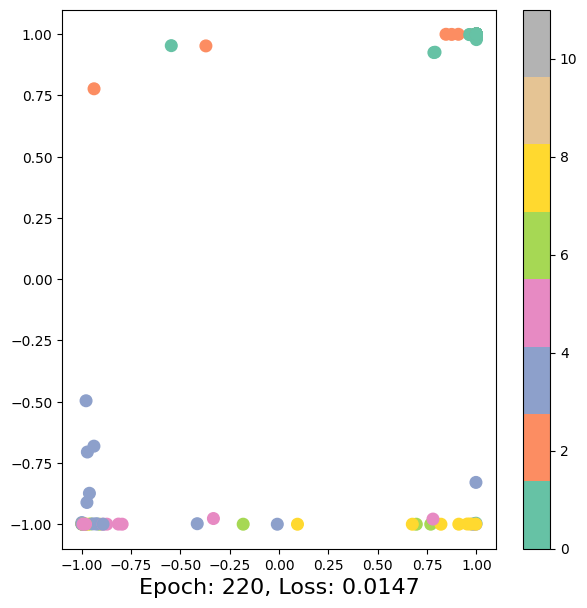

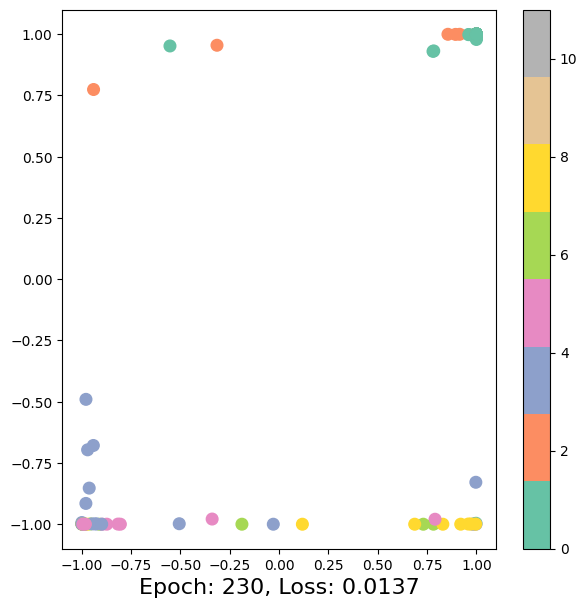

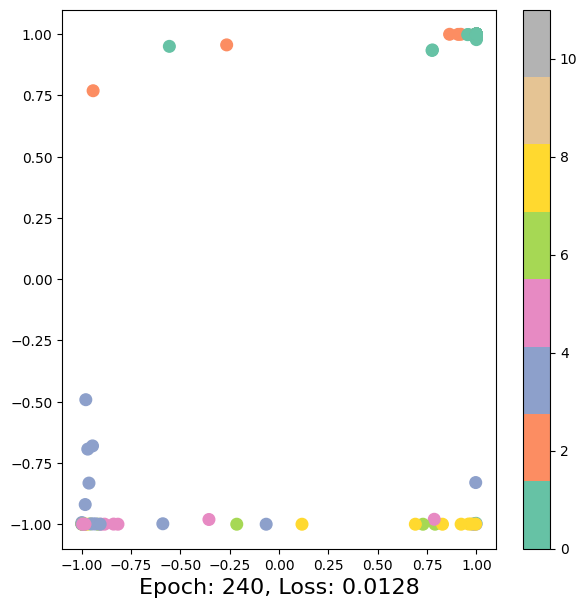

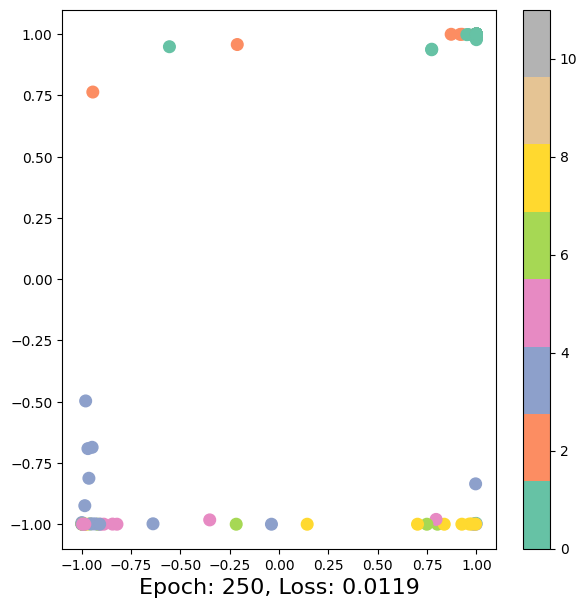

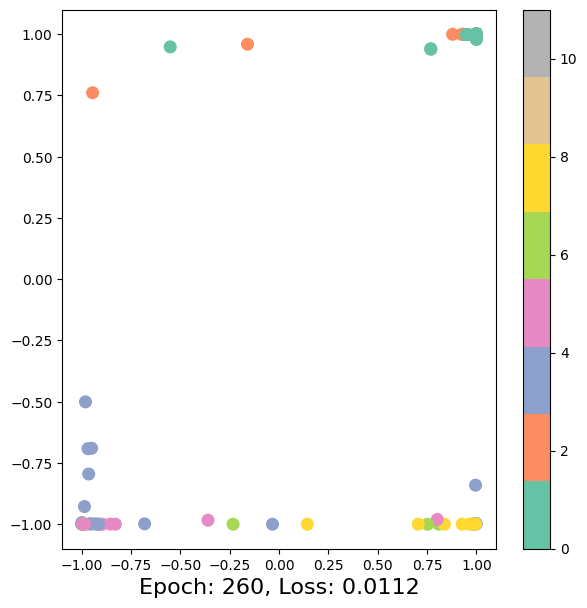

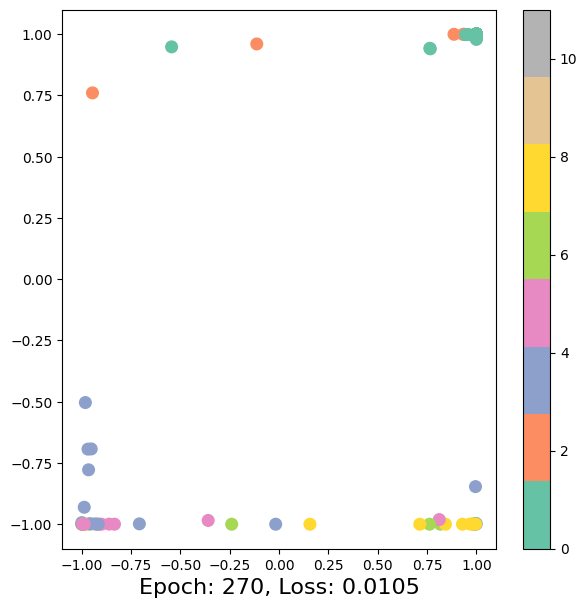

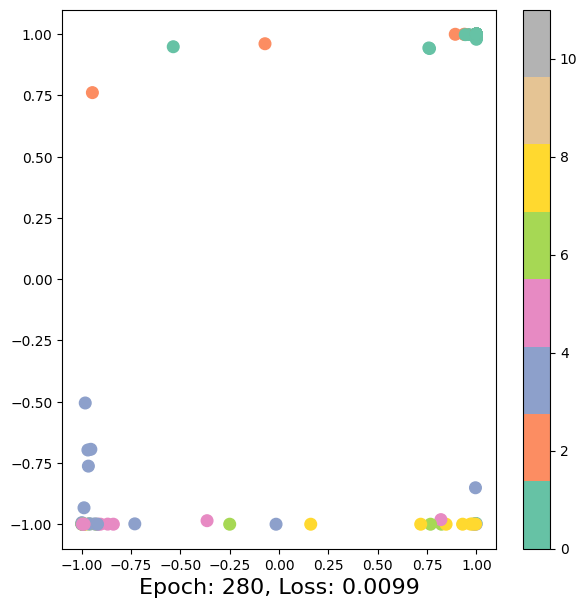

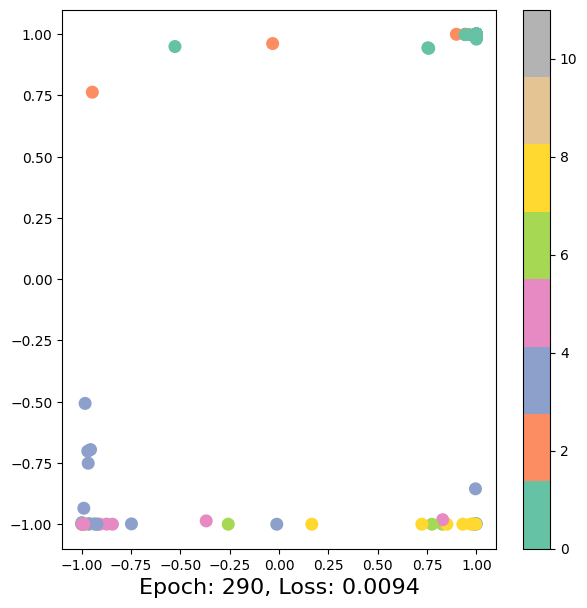

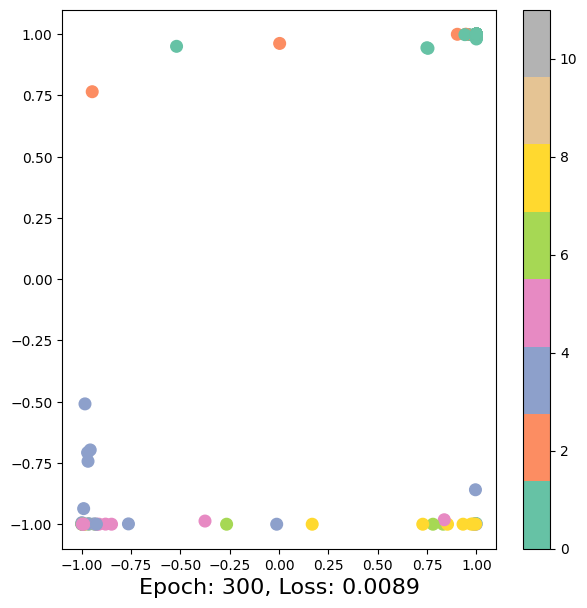

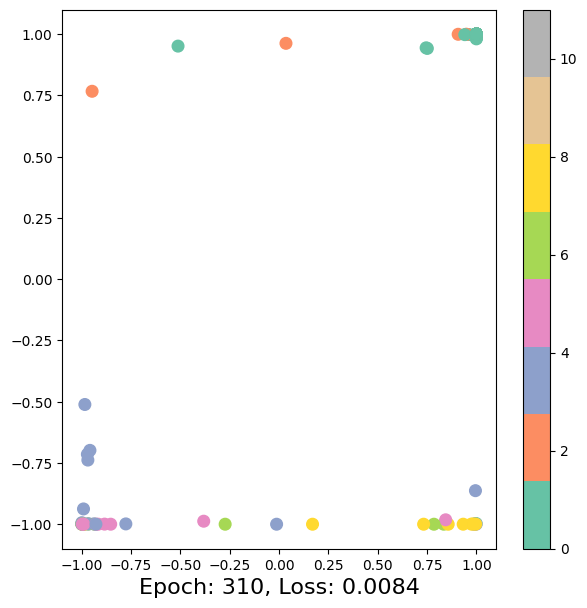

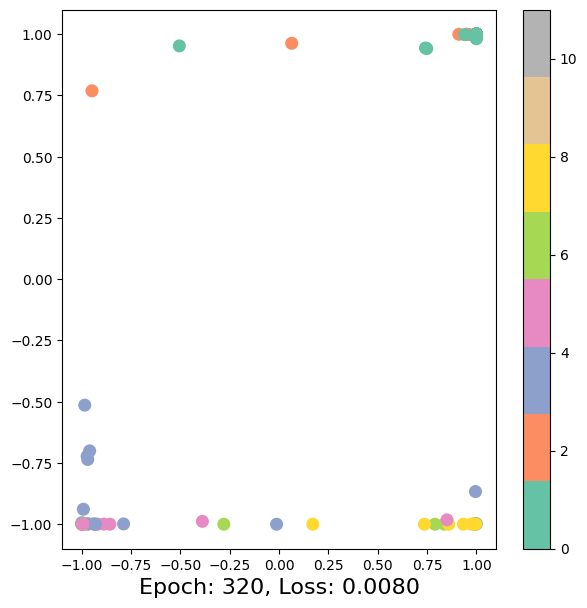

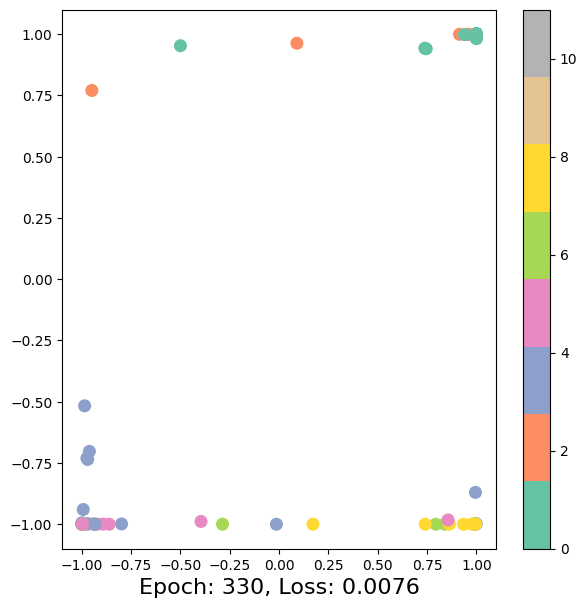

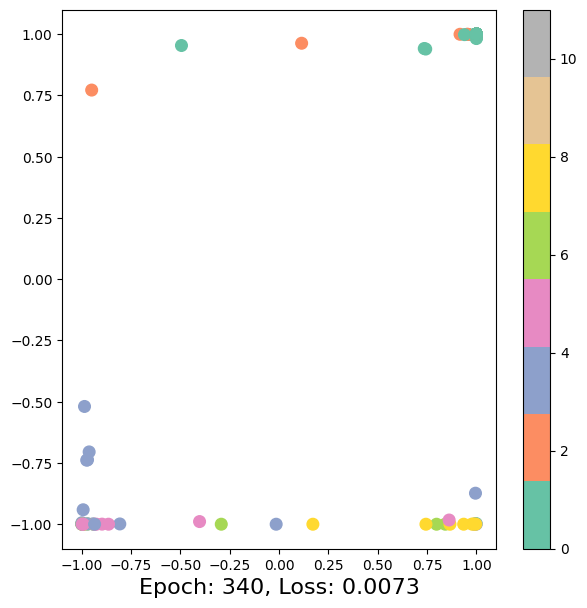

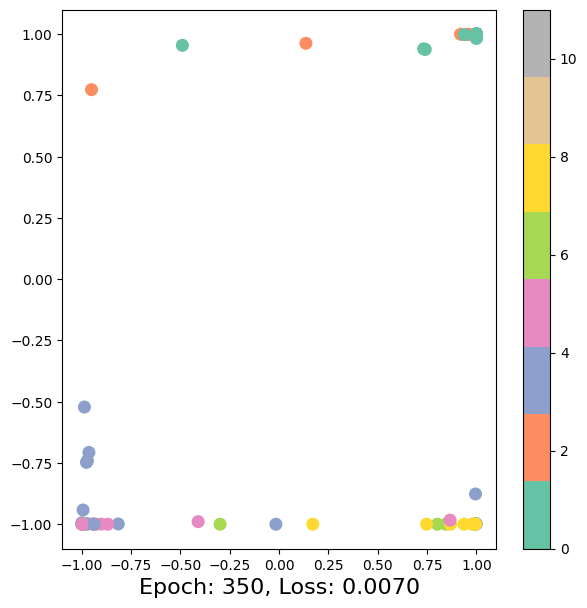

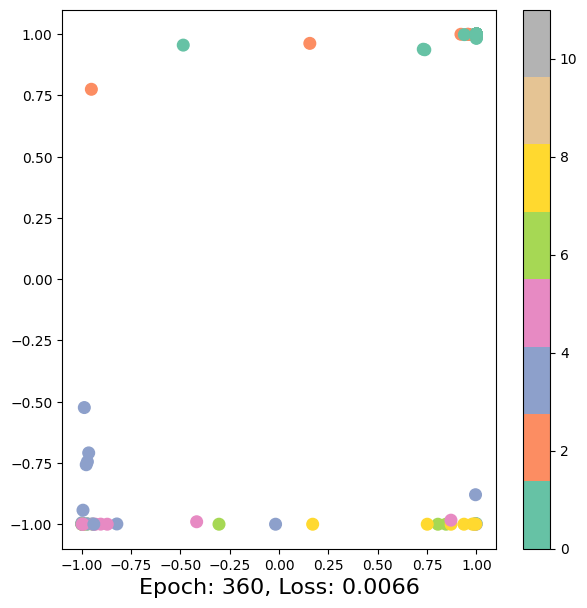

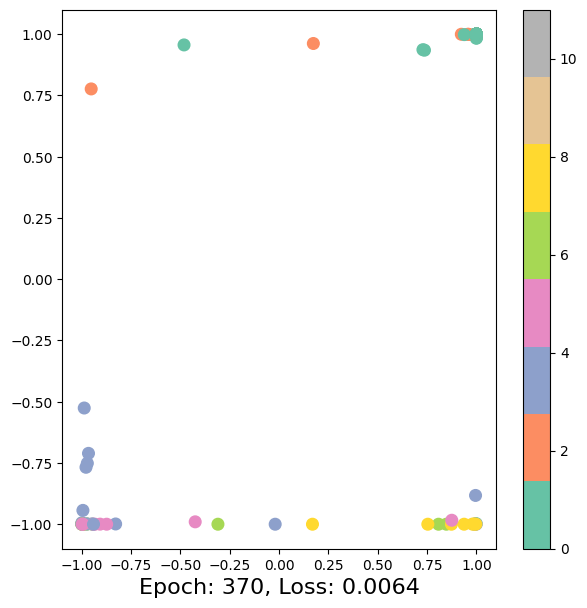

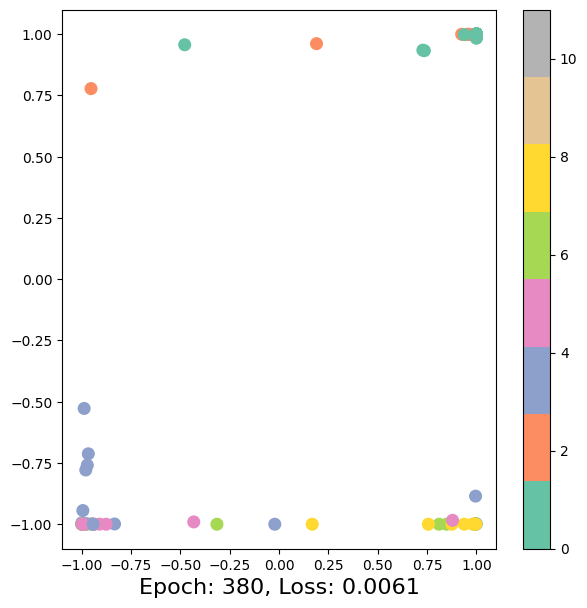

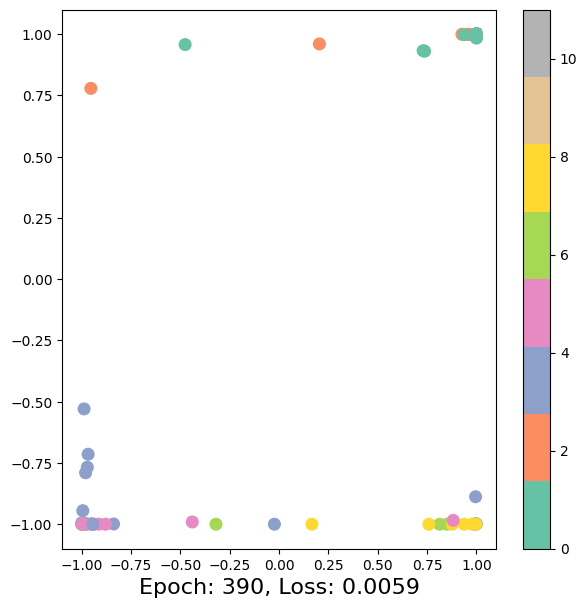

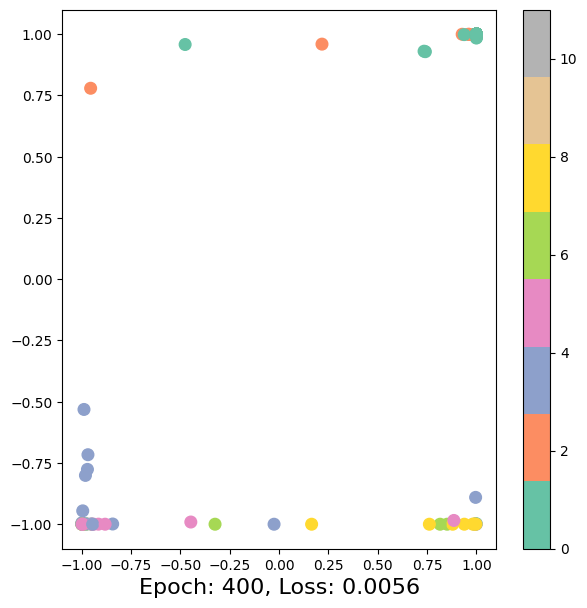

In [293]:
import time
from IPython.display import Javascript  # Restrict height of output cell.

display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.b.float(), data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask].long())  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h
loss_remember=[]
for epoch in range(401):
    loss, h = train(data)
    loss_remember.append(loss)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.z, epoch=epoch, loss=loss)
        time.sleep(0.1)

Text(0, 0.5, 'Loss')

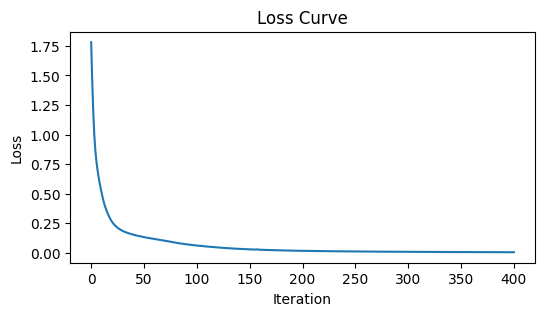

In [294]:
for i in range(len(loss_remember)):

    loss_remember[i]=loss_remember[i].detach().numpy()

import matplotlib.pyplot as plt
import numpy as np
losses=loss_remember
plt.figure(figsize=(6,3))
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")

In [ ]:
print(h)
print(h.shape)

tensor([[ 1.0000, -1.0000, -1.0000, -0.9935, -1.0000, -1.0000],
        [ 1.0000, -1.0000, -1.0000, -0.9976, -1.0000, -1.0000],
        [ 1.0000, -1.0000, -1.0000, -0.9965, -1.0000, -1.0000],
        ...,
        [-0.9998, -1.0000,  0.9998, -1.0000,  0.9999,  0.9436],
        [-0.9998, -1.0000,  0.9999, -1.0000,  0.9999, -0.9781],
        [ 0.9988, -1.0000, -1.0000, -0.9993, -0.9962, -0.6522]],
       grad_fn=<TanhBackward0>)
torch.Size([291, 6])


# 使用一些手段获取核心区的位置信息

In [295]:
#节点和数字间的映射关系(翻转)
print(reversed_dict)

{'桂林北站': '0', '站前路西': '1', '桂北客运站': '2', '站前路中': '3', '站前路': '4', '站前路东': '5', '南洲大桥北': '6', '南洲大桥南': '7', '芳华路': '8', '五福村': '9', '芳华路东': '10', '芳华路西': '11', '新建路口': '12', '群众路口': '13', '商贸城': '14', '北极广场': '15', '观音阁': '16', '东镇路': '17', '凤北路口': '18', '乐群路口': '19', '十字街(解放西路)': '20', '艺术馆': '21', '观漪桥': '22', '信义路口': '23', '西凤路口': '24', '九岗岭': '25', '西门菜市': '26', '东安街口': '27', '象山区政府': '28', '机场路口': '29', '翠竹路': '30', '黑山路口': '31', '东莲站': '32', '鼎富大厦': '33', '琴潭汽车客运站': '34', '象山公园': '35', '漓江剧院': '36', '解放桥': '37', '伏波山': '38', '叠彩山': '39', '十字街中心广场': '40', '文明路': '41', '民主路': '42', '安新小区北门': '43', '上海路口': '44', '红岭路南口': '45', '红岭路北口': '46', '东安路': '47', '东安路西': '48', '琴潭中隐路口': '49', '中隐路尾': '50', '养生谷·中医街': '51', '桂林健康学院': '52', '养生谷·颐养阁': '53', '中隐路(马家蚌村)': '54', '熊家村': '55', '西二环': '56', '福达农产品物流园': '57', '天鹅塘': '58', '桂林站': '59', '南门桥南': '60', '西城路口': '61', '阳桥': '62', '信义路尾': '63', '隧道北口': '64', '芦笛路': '65', '环城北一路': '66', '圣隆路': '67', '九华山': '68', '芦笛菜市': '69', '冶金机械厂': '70', '

In [298]:
H=[]
for  i in range(len(attribute_label)):
  if h[i][2]<0  :#and h[i][1]>=-1
    H.append(i)
  else:
     pass

H=np.array(H)

In [299]:
print(H.shape)
H

(48,)


array([ 16,  17,  18,  19,  20,  21,  22,  23,  35,  36,  37,  38,  39,
        40,  41,  60,  61,  62, 120, 134, 135, 136, 137, 138, 139, 140,
       141, 161, 162, 163, 164, 259, 268, 269, 270, 278, 279, 280, 281,
       282, 283, 284, 285, 286, 287, 288, 290, 291])

In [300]:
new_list = []
for key in H:
  new_list.append(mapping_dict[str(key)])
new_list

['观音阁',
 '东镇路',
 '凤北路口',
 '乐群路口',
 '十字街(解放西路)',
 '艺术馆',
 '观漪桥',
 '信义路口',
 '象山公园',
 '漓江剧院',
 '解放桥',
 '伏波山',
 '叠彩山',
 '十字街中心广场',
 '文明路',
 '南门桥南',
 '西城路口',
 '阳桥',
 '十字街(解放东路)',
 '滨江路中',
 '宝贤桥',
 '翊武路',
 '西门桥',
 '少年宫',
 '信义丽君路口',
 '丽泽桥',
 '西清湖',
 '丽君路',
 '信义市场',
 '龙隐桥',
 '龙隐路',
 '西湖苑',
 '伏龙州公园',
 '伏波山公园',
 '訾洲',
 '木龙湖',
 '木龙桥',
 '宝积桥',
 '四会路桥',
 '榕湖',
 '日月双塔',
 '信义桥',
 '榕湖双船闸',
 '中山南路(桥)',
 '文昌桥',
 '象鼻山',
 '驿前直里',
 '木龙湖·东镇门']

**寻找new_list之间的链接关系(获取节点的邻居)**

In [302]:
#重新构建图
# 读取CSV文件
df_links = df
df_attributes = df_2

# 创建一个空的多重图
G = nx.MultiGraph()

# 添加节点和边到多重图
for _, row in df_links.iterrows():
    node1 = row['前一节点']
    node2 = row['后一节点']
    edge_attr = row['线路名称']
    if pd.notna(node1) and pd.notna(node2):
        G.add_edge(node1, node2, attribute=edge_attr)


# 添加节点属性到多重图
for _, row in df_attributes.iterrows():
    node = row['节点名称']
    attr1 = row['区域属性']
    attr2 = row['线路']
    attr3 = row['500M内文保单位/古迹遗址/宗祠故地的个数']
    attr4 = row['300M内文保单位/古迹遗址/宗祠故地的个数']

    if pd.notna(node):
        G.add_node(node)
        G.nodes[node]['区域属性'] = attr1
        G.nodes[node]['线路'] = attr2
        G.nodes[node]['500M内文保单位/古迹遗址/宗祠故地的个数'] = attr3
        G.nodes[node]['300M内文保单位/古迹遗址/宗祠故地的个数'] = attr4

In [303]:

result = []
for m in new_list:
    neighbors = G.neighbors(m) # 获得节点m的所有邻居
    common_neighbors = [n for n in neighbors if n in new_list] # 保留那些在new_list中的邻居
    result.append([m + ":" + ", ".join(common_neighbors)])

result

[['观音阁:东镇路, 西清湖, 凤北路口, 驿前直里'],
 ['东镇路:观音阁, 凤北路口, 叠彩山'],
 ['凤北路口:东镇路, 乐群路口, 叠彩山, 宝贤桥, 翊武路, 观音阁'],
 ['乐群路口:凤北路口, 十字街(解放西路), 十字街中心广场, 丽泽桥, 宝贤桥, 十字街(解放东路)'],
 ['十字街(解放西路):乐群路口, 艺术馆, 阳桥, 翊武路, 解放桥, 十字街(解放东路)'],
 ['艺术馆:十字街(解放西路), 观漪桥, 翊武路'],
 ['观漪桥:艺术馆, 信义路口, 信义市场, 四会路桥, 丽泽桥'],
 ['信义路口:观漪桥, 西湖苑'],
 ['象山公园:漓江剧院, 文明路, 滨江路中'],
 ['漓江剧院:象山公园, 解放桥'],
 ['解放桥:漓江剧院, 伏波山, 十字街(解放东路), 十字街中心广场, 滨江路中, 十字街(解放西路), 伏波山公园, 訾洲'],
 ['伏波山:解放桥, 叠彩山'],
 ['叠彩山:伏波山, 凤北路口, 东镇路, 伏龙州公园, 木龙湖, 木龙湖·东镇门'],
 ['十字街中心广场:乐群路口, 文明路, 解放桥, 阳桥'],
 ['文明路:十字街中心广场, 象山公园, 南门桥南, 西城路口'],
 ['南门桥南:西城路口, 文明路, 阳桥, 西门桥'],
 ['西城路口:南门桥南, 阳桥, 文明路, 西门桥'],
 ['阳桥:西城路口, 十字街(解放西路), 十字街(解放东路), 十字街中心广场, 南门桥南'],
 ['十字街(解放东路):阳桥, 解放桥, 乐群路口, 十字街(解放西路)'],
 ['滨江路中:象山公园, 解放桥'],
 ['宝贤桥:凤北路口, 翊武路, 乐群路口, 西清湖'],
 ['翊武路:宝贤桥, 十字街(解放西路), 艺术馆, 凤北路口'],
 ['西门桥:南门桥南, 少年宫, 西城路口, 榕湖双船闸, 中山南路(桥)'],
 ['少年宫:西门桥, 信义丽君路口'],
 ['信义丽君路口:少年宫, 丽泽桥, 信义市场'],
 ['丽泽桥:信义丽君路口, 乐群路口, 观漪桥, 榕湖'],
 ['西清湖:宝贤桥, 观音阁'],
 ['丽君路:信义市场'],
 ['信义市场:丽君路, 观漪桥, 信义丽君路口'],
 ['龙隐桥:龙隐路'],
 ['龙隐路:龙隐桥'],
 ['西

**查询方式**

In [311]:
target = "中山南路(桥)"

matching_sublists = [sublist for sublist in result if target in sublist[0]]

matching_sublists

[['西门桥:南门桥南, 少年宫, 西城路口, 榕湖双船闸, 中山南路(桥)'],
 ['中山南路(桥):西门桥, 文昌桥'],
 ['文昌桥:中山南路(桥), 象鼻山']]

**三维可视化**

In [306]:
h.shape
B=data.y
B.shape
# 将NumPy数组转换为Python列表
h_1= h.tolist()
B_1=B.tolist()

In [307]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

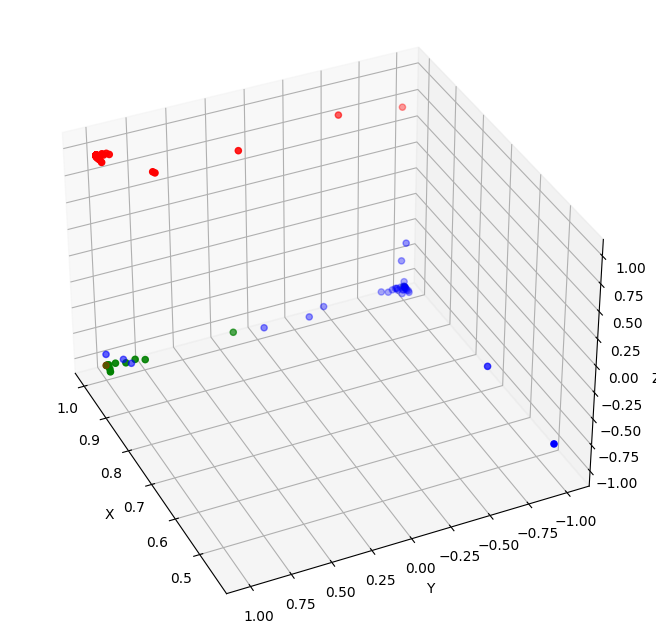

In [309]:
# 提取h的坐标数据
x = [row[0] for row in h_1]
y = [row[1] for row in h_1]
z = [row[2] for row in h_1]

# 创建三维图形对象
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，并根据列表B的值设置不同的颜色
colors = ['red', 'blue', 'green']
label_set = set(B_1)  # 获取唯一的标签值
for label in label_set:
    indices = [i for i, value in enumerate(B_1) if value == label]
    ax.scatter([x[i] for i in indices], [y[i] for i in indices], [z[i] for i in indices], c=colors[label], marker='o')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# 设置初始视角  elev表示俯仰角  azim表示方位角
ax.view_init(elev=35, azim=155)

# 显示图形
plt.show()